<a href="https://colab.research.google.com/github/mayapatri/mayapatri.github.io/blob/main/Lyme_Incident_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expansion of Lyme Cases in the United States Over 25 years


---


### Maya Patri and Dylan Murray

In [40]:
%cd /content
!rm -rf mayapatri.github.io  # Remove any previous clone
!git clone https://github.com/mayapatri/mayapatri.github.io.git
%cd mayapatri.github.io

from google.colab import drive
drive.mount('/content/drive/')

/content
Cloning into 'mayapatri.github.io'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 401.99 KiB | 8.93 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/mayapatri.github.io
Mounted at /content/drive/


In [41]:
%%shell
jupyter nbconvert --to html /content/drive/lyme_disease_milestone1.ipynb


[NbConvertApp] WARNING | pattern '/content/drive/lyme_disease_milestone1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.ans

CalledProcessError: Command 'jupyter nbconvert --to html /content/drive/lyme_disease_milestone1.ipynb
' returned non-zero exit status 255.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/mayapatri.github.io/milestone 1/LymeDisease_9211_county.csv')

  StateName      CountyName  StateCode  CountyCode             YearRange  \
0   Alabama         Alabama          1           0  Lyme Cases 1992-1996   
1   Alabama  Autauga County          1           1  Lyme Cases 1992-1996   
2   Alabama  Baldwin County          1           3  Lyme Cases 1992-1996   
3   Alabama  Barbour County          1           5  Lyme Cases 1992-1996   
4   Alabama     Bibb County          1           7  Lyme Cases 1992-1996   

   Cases  
0      0  
1      0  
2      4  
3      0  
4      1  


<ipython-input-37-27217ca8d770>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=national_cases, x='YearRange', y='Cases', palette='Blues')


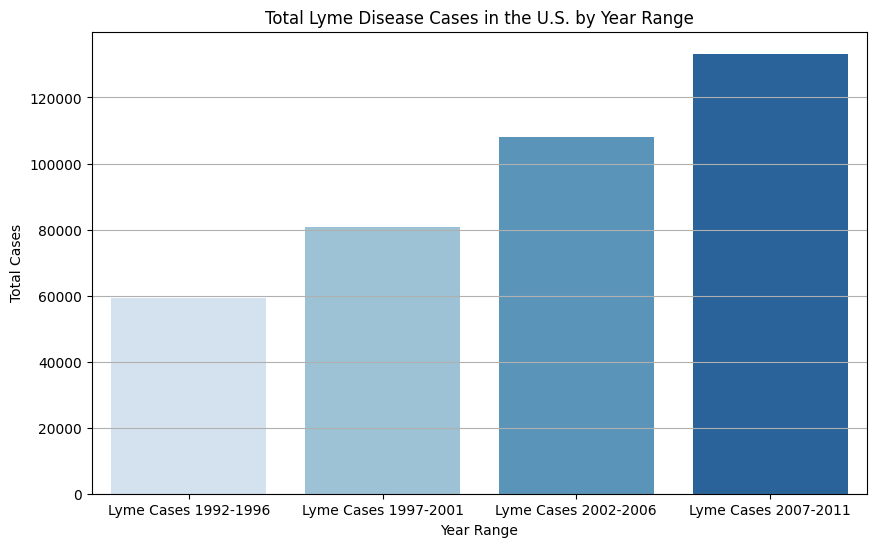

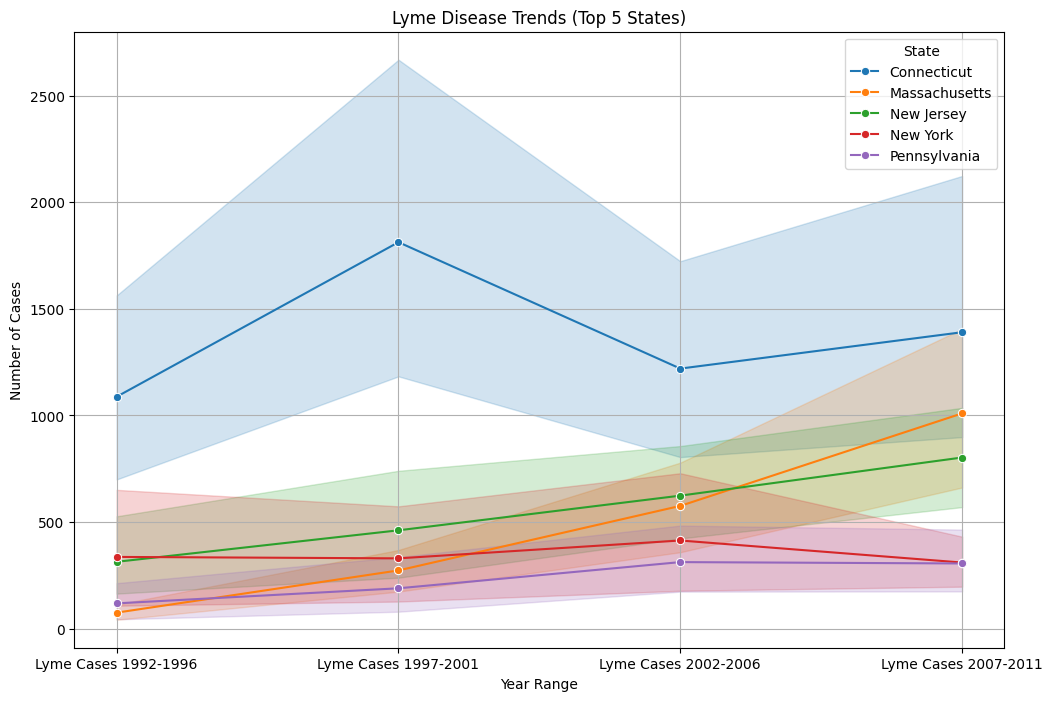

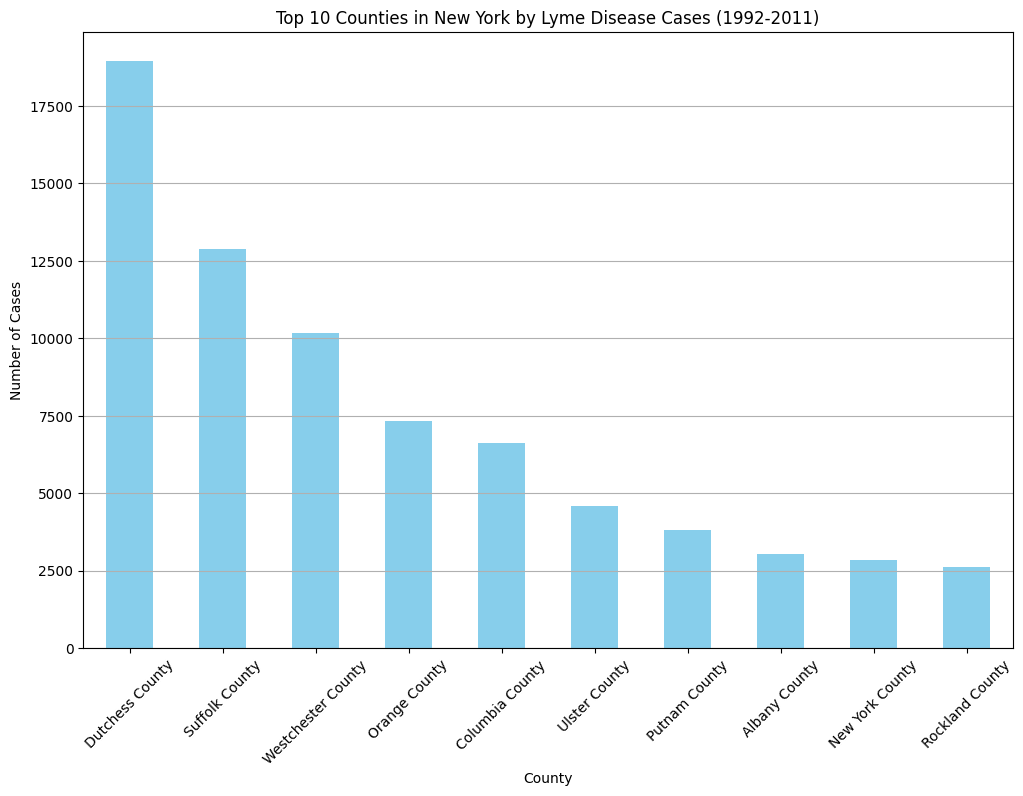

In [37]:
df.rename(columns={'ConfirmedCount_1992_1996': 'Lyme Cases 1992-1996'}, inplace=True)
df.rename(columns={'ConfirmedCount_1997_2001': 'Lyme Cases 1997-2001'}, inplace=True)
df.rename(columns={'ConfirmedCount_2002_2006': 'Lyme Cases 2002-2006'}, inplace=True)
df.rename(columns={'ConfirmedCount_2007_2011': 'Lyme Cases 2007-2011'}, inplace=True)

df.fillna(0, inplace=True)

df['StateCode'] = df['StateCode'].astype(int)
df['CountyCode'] = df['CountyCode'].astype(int)

df['StateName'] = df['StateName'].astype(str)
df['CountyName'] = df['CountyName'].astype(str)

df['Lyme Cases 1992-1996'] = df['Lyme Cases 1992-1996'].astype(int)
df['Lyme Cases 1997-2001'] = df['Lyme Cases 1997-2001'].astype(int)
df['Lyme Cases 2002-2006'] = df['Lyme Cases 2002-2006'].astype(int)
df['Lyme Cases 2007-2011'] = df['Lyme Cases 2007-2011'].astype(int)

df_long = df.melt(
    id_vars=['StateName', 'CountyName', 'StateCode', 'CountyCode'],
    value_vars=[
        'Lyme Cases 1992-1996',
        'Lyme Cases 1997-2001',
        'Lyme Cases 2002-2006',
        'Lyme Cases 2007-2011'
    ],
    var_name='YearRange',
    value_name='Cases'
)

# reshaped data
print(df_long.head())

# aggregate national cases per year range
national_cases = df_long.groupby('YearRange')['Cases'].sum().reset_index()

# plot national cases over the time periods
plt.figure(figsize=(10,6))
sns.barplot(data=national_cases, x='YearRange', y='Cases', palette='Blues')

plt.title('Total Lyme Disease Cases in the U.S. by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Total Cases')
plt.grid(axis='y')
plt.show()

# aggregate cases by state and sort states by total cases
state_cases = df_long.groupby('StateName')['Cases'].sum().reset_index().sort_values(by='Cases', ascending=False)

# get top 5 states
top_states = state_cases.head(5)['StateName'].tolist()

# filter the dataset for top 5 states
top_states_df = df_long[df_long['StateName'].isin(top_states)]

# plotting
plt.figure(figsize=(12,8))
sns.lineplot(data=top_states_df, x='YearRange', y='Cases', hue='StateName', marker='o')

plt.title('Lyme Disease Trends (Top 5 States)')
plt.xlabel('Year Range')
plt.ylabel('Number of Cases')
plt.legend(title='State')
plt.grid(True)
plt.show()

# county-level visualization for a specific state NewYork
ny_df = df_long[df_long['StateName'] == 'New York']

# aggregate county cases
county_cases_ny = ny_df.groupby('CountyName')['Cases'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
county_cases_ny.plot(kind='bar', color='skyblue')
plt.title('Top 10 Counties in New York by Lyme Disease Cases (1992-2011)')
plt.xlabel('County')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()